In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

import time

In [ ]:
# data process
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])  # normalization and standardization

train_data = torchvision.datasets.FashionMNIST(root='fmnist_data/', train=True, download=True, transform=transform)
test_data = torchvision.datasets.FashionMNIST(root='fmnist_data/', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

100%|██████████| 26421880/26421880 [00:02<00:00, 8951421.98it/s]


Extracting fmnist_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199684.30it/s]


Extracting fmnist_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3737668.93it/s]


Extracting fmnist_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5971315.54it/s]

Extracting fmnist_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist_data/FashionMNIST/raw



Classify with CNN

Epoch [1/15], Train Loss: 0.4779, Test Loss: 0.3340, Test Accuracy: 87.55%
Epoch [2/15], Train Loss: 0.3087, Test Loss: 0.2933, Test Accuracy: 89.24%
Epoch [3/15], Train Loss: 0.2633, Test Loss: 0.2478, Test Accuracy: 91.07%
Epoch [4/15], Train Loss: 0.2266, Test Loss: 0.2400, Test Accuracy: 91.15%
Epoch [5/15], Train Loss: 0.2012, Test Loss: 0.2427, Test Accuracy: 91.63%
Epoch [6/15], Train Loss: 0.1825, Test Loss: 0.2319, Test Accuracy: 92.13%
Epoch [7/15], Train Loss: 0.1647, Test Loss: 0.2358, Test Accuracy: 91.77%
Epoch [8/15], Train Loss: 0.1487, Test Loss: 0.2288, Test Accuracy: 92.14%
Epoch [9/15], Train Loss: 0.1312, Test Loss: 0.2380, Test Accuracy: 92.16%
Epoch [10/15], Train Loss: 0.1207, Test Loss: 0.2519, Test Accuracy: 92.21%
Epoch [11/15], Train Loss: 0.1113, Test Loss: 0.2610, Test Accuracy: 92.21%
Epoch [12/15], Train Loss: 0.0988, Test Loss: 0.2566, Test Accuracy: 91.95%
Epoch [13/15], Train Loss: 0.0902, Test Loss: 0.2936, Test Accuracy: 91.91%
Epoch [14/15], Train 

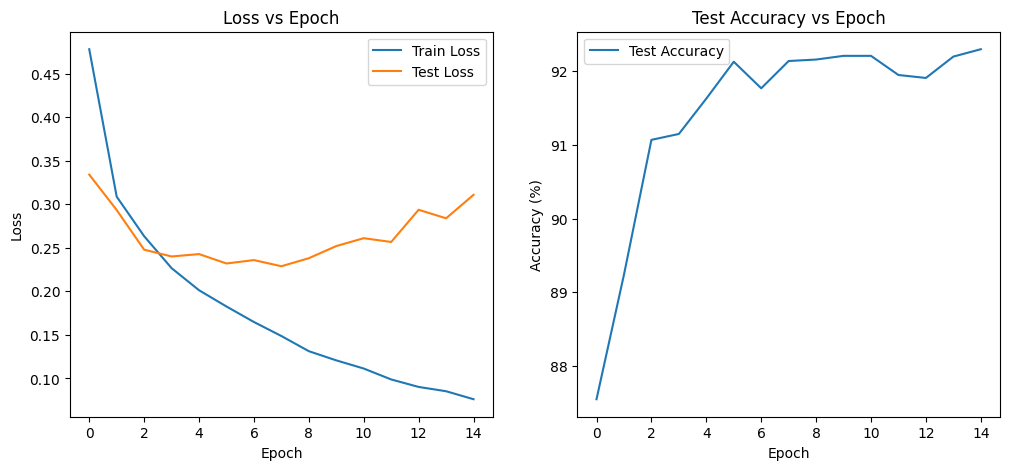

In [ ]:
model = CNNClassifier()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 15
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_losses[-1]:.4f}, '
          f'Test Loss: {test_losses[-1]:.4f}, '
          f'Test Accuracy: {test_accuracies[-1]:.2f}%')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy vs Epoch')
plt.legend()

plt.show()


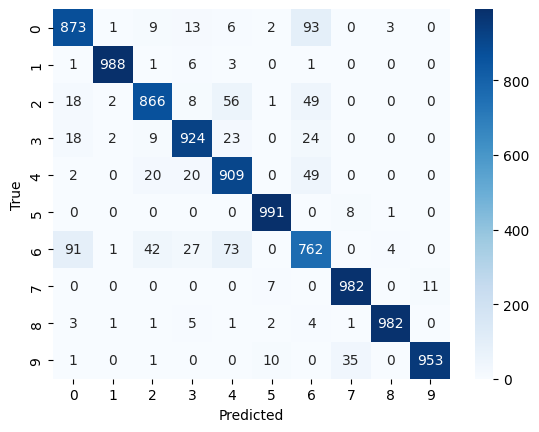

In [ ]:
# confusion matrix
all_preds = []
all_labels = []

model.eval()
start_time = time.time()
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        preds = output.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
end_time = time.time()
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# 6 and 0 look similar

In [ ]:
# classification_report
report = classification_report(all_labels, all_preds, target_names=train_data.classes)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.87      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.91      0.87      0.89      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.85      0.91      0.88      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total parameters: {total_params}')
print(f'CNN inference time: {end_time - start_time:.3f} seconds')

Total parameters: 421642
CNN inference time: 2.617 seconds


Classify without using CNN

Epoch [1/50], Train Loss: 0.6863, Test Loss: 0.4873, Test Accuracy: 81.89%
Epoch [2/50], Train Loss: 0.5184, Test Loss: 0.4389, Test Accuracy: 83.91%
Epoch [3/50], Train Loss: 0.4749, Test Loss: 0.4273, Test Accuracy: 84.16%
Epoch [4/50], Train Loss: 0.4585, Test Loss: 0.4062, Test Accuracy: 84.96%
Epoch [5/50], Train Loss: 0.4382, Test Loss: 0.4163, Test Accuracy: 84.41%
Epoch [6/50], Train Loss: 0.4249, Test Loss: 0.3848, Test Accuracy: 85.84%
Epoch [7/50], Train Loss: 0.4131, Test Loss: 0.3857, Test Accuracy: 85.82%
Epoch [8/50], Train Loss: 0.4071, Test Loss: 0.3748, Test Accuracy: 86.22%
Epoch [9/50], Train Loss: 0.3974, Test Loss: 0.3641, Test Accuracy: 86.48%
Epoch [10/50], Train Loss: 0.3884, Test Loss: 0.3701, Test Accuracy: 86.38%
Epoch [11/50], Train Loss: 0.3868, Test Loss: 0.3692, Test Accuracy: 86.20%
Epoch [12/50], Train Loss: 0.3802, Test Loss: 0.3606, Test Accuracy: 87.00%
Epoch [13/50], Train Loss: 0.3734, Test Loss: 0.3581, Test Accuracy: 86.96%
Epoch [14/50], Train 

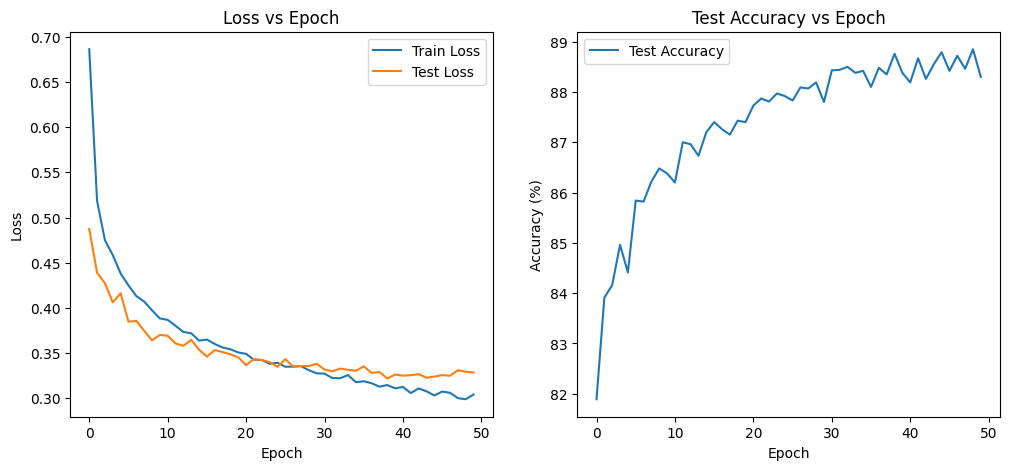

In [ ]:
model = NonCNNClassifier()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_losses[-1]:.4f}, '
          f'Test Loss: {test_losses[-1]:.4f}, '
          f'Test Accuracy: {test_accuracies[-1]:.2f}%')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy vs Epoch')
plt.legend()

plt.show()


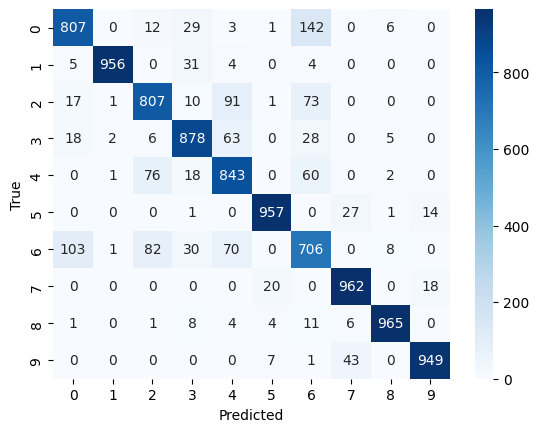

In [ ]:
all_preds = []
all_labels = []

model.eval()
start_time = time.time()
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        preds = output.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
end_time = time.time()
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
report = classification_report(all_labels, all_preds, target_names=train_data.classes)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.81      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.82      0.81      0.81      1000
       Dress       0.87      0.88      0.88      1000
        Coat       0.78      0.84      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.69      0.71      0.70      1000
     Sneaker       0.93      0.96      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total parameters: {total_params}')
print(f'Non-CNN inference time: {end_time - start_time:.3f} seconds')

Total parameters: 242762
Non-CNN inference time: 1.281 seconds


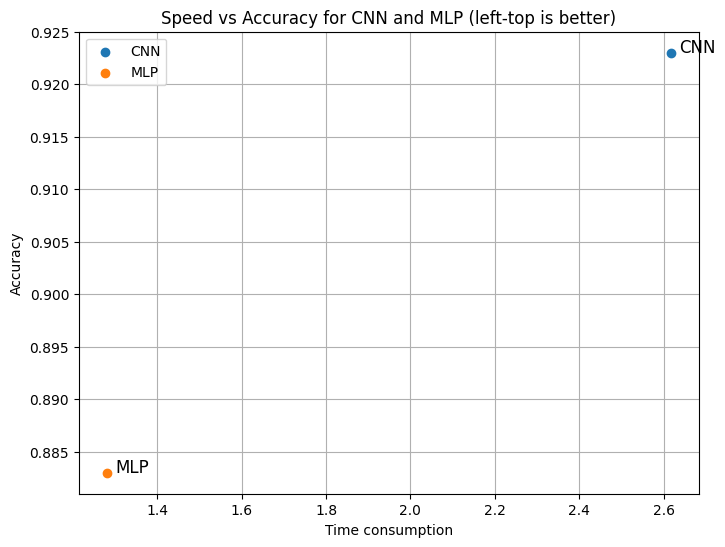

In [ ]:
import matplotlib.pyplot as plt
points = {
    "CNN": (2.617, 0.923),
    "MLP": (1.281, 0.883)
}

plt.figure(figsize=(8, 6))
for point, (x, y) in points.items():
    plt.scatter(x, y, label=point)
    plt.text(x + 0.02, y, point, fontsize=12, ha='left')

plt.xlabel("Time consumption")
plt.ylabel("Accuracy")
plt.title("Speed vs Accuracy for CNN and MLP (left-top is better)")

plt.legend()

plt.grid(True)
plt.show()

Test the model

Epoch [1/15], Train Loss: 0.4725, Test Loss: 0.3228, Test Accuracy: 87.93%
Epoch [2/15], Train Loss: 0.3109, Test Loss: 0.2904, Test Accuracy: 89.40%
Epoch [3/15], Train Loss: 0.2652, Test Loss: 0.2752, Test Accuracy: 89.91%
Epoch [4/15], Train Loss: 0.2373, Test Loss: 0.2483, Test Accuracy: 90.86%
Epoch [5/15], Train Loss: 0.2138, Test Loss: 0.2430, Test Accuracy: 91.16%
Epoch [6/15], Train Loss: 0.1955, Test Loss: 0.2376, Test Accuracy: 91.45%
Epoch [7/15], Train Loss: 0.1747, Test Loss: 0.2234, Test Accuracy: 92.19%
Epoch [8/15], Train Loss: 0.1598, Test Loss: 0.2302, Test Accuracy: 92.18%
Epoch [9/15], Train Loss: 0.1445, Test Loss: 0.2295, Test Accuracy: 92.36%
Epoch [10/15], Train Loss: 0.1309, Test Loss: 0.2352, Test Accuracy: 92.29%
Epoch [11/15], Train Loss: 0.1201, Test Loss: 0.2371, Test Accuracy: 92.30%
Epoch [12/15], Train Loss: 0.1086, Test Loss: 0.2467, Test Accuracy: 92.33%
Epoch [13/15], Train Loss: 0.0991, Test Loss: 0.2707, Test Accuracy: 92.30%
Epoch [14/15], Train 

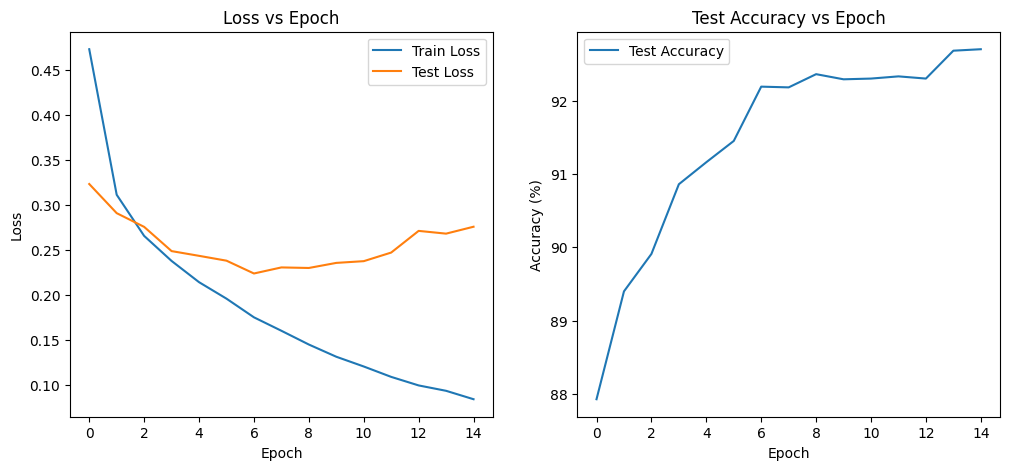

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNNClassifier()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 15
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_losses[-1]:.4f}, '
          f'Test Loss: {test_losses[-1]:.4f}, '
          f'Test Accuracy: {test_accuracies[-1]:.2f}%')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy vs Epoch')
plt.legend()

plt.show()

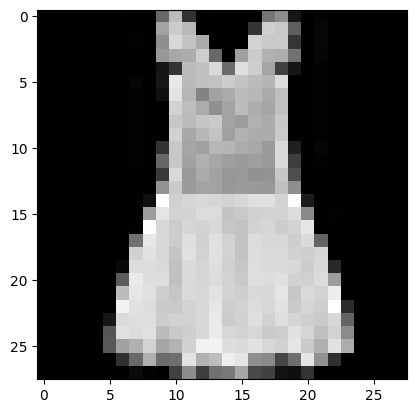

Prediction: Dress
Ground truth: Dress


In [ ]:
import random

model.eval()

test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)
data_iter = iter(test_loader)
images, labels = next(data_iter)

with torch.no_grad():
    output = model(images.to(device))
    _, predicted = torch.max(output, 1)


plt.imshow(images[0].squeeze(), cmap='gray')
plt.show()

print(f'Prediction: {test_data.classes[predicted.item()]}')
print(f'Ground truth: {test_data.classes[labels.item()]}')


In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
class NonCNNClassifier(nn.Module):
    def __init__(self):
        super(NonCNNClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x